In [60]:
import numpy as np
from numpy import sin,pi
import random
import matplotlib.pyplot as plt
import copy
import pandas as pd

In [61]:
pop_size = 100 #總共有幾個染色體 populations
bits = 40 #每個染色體的bits數 num_bits
lower, upper = -500,500 #bound
crossover_rate = 0.8 #交配的機率
mutation_rate = 0.1 #變異的機率
iter = 100 #總共要迭代幾個世代 #iteration times 

#建立一個0,1的陣列 construct a array contain 0 and 1 
chromosomes  = np.random.randint(0, 2, (pop_size, bits)).astype(str)
chromosomes.shape

(100, 40)

In [62]:
#將2進制轉成10進制再轉成在 domain range的數字 tran bin to dec, and fit the domain range
'''here we use the head 20 as x, and last 20 as y
'''
def decoder_x(chromosomes, index):
    return round((lower + int(''.join(chromosomes[index][:20]),2) *1000/(2**20-1)),3)

def decoder_y(chromosomes, index):
    return round((lower + int(''.join(chromosomes[index][20:]),2) *1000/(2**20-1)),3)

#定義目標函數 define the fitness function
def fitness(chomosomes, index):
    x = decoder_x(chomosomes, index)
    y = decoder_y(chomosomes, index)
    if x >= -500 and x <= 500 :
        if y >= -500 and y <= 500:
            return round((7*x ** 2 - 6 * (3 ** 0.5) * x * y + 13 * y**2),3)
    else:
        return 999999999999999  #minimizie question, so we return a so big number
#競爭法 competition method
def selection(chromosomes):
    ''' here we random choose 4 genes, and compete with each other, we want the fitness is the smallest'''
    temp = []
    for i in range(4):
        index = random.randint(0,pop_size-1)
        temp.append(index)
        
    chromo_index = []
    if fitness(chromosomes,temp[0]) < fitness(chromosomes,temp[1]):
        chromo_index.append(temp[0])
    else:
        chromo_index.append(temp[1])

    if fitness(chromosomes,temp[2]) < fitness(chromosomes,temp[3]):
        chromo_index.append(temp[2])
    else:
        chromo_index.append(temp[3])
    
    chromo_temp = []
    
    for j in chromo_index:
        chromo_temp.append(chromosomes[j])
        
    return chromo_temp
#單點法 one-point method
def crossover(chromosomes, parent_1, parent_2):
    temp1 = []
    temp2 = []
    child = []
    #here we randomly find a point and do a simple switch
    slide = random.randint(0,bits)
    temp1 = list(parent_1[slide:]).copy()
    temp2 = list(parent_2[slide:]).copy()
    parent_1[slide:] = temp2
    parent_2[slide:] = temp1
    child = [parent_1, parent_2]
    return child

#單點法 one-point method
def mutation(chromosomes, child_1, child_2):
    child =[]
    slide = random.randint(0,bits-1)
    if child_1[slide] == '1':
        child_1[slide] = '0'
    else:
        child_1[slide] = '1'
        
    if child_2[slide] == '1':
        child_2[slide] = '0'
    else:
        child_2[slide] = '1'
    child = [child_1, child_2]
    return child    
      

In [63]:
#define the GA function
def do_GA(iter, chromosomes):
    result = []
    history_best = 9999999999
    best_x = 0
    best_y = 0
    for epoch in range(iter):
        x = 0
        y = 0
        best_fit = 999999999
        temp_chromo = []
        for i in range(pop_size):
            if fitness(chromosomes, i) < best_fit:
                best_fit = fitness(chromosomes, i)
                x = decoder_x(chromosomes, i)
                y = decoder_y(chromosomes, i)
                
            if history_best > best_fit:
                history_best = best_fit
                best_x = x
                best_y = y
                   
        result.append([i , best_fit, x, y, history_best])
        print('Epoch:',epoch+1 ,'|best fit:',best_fit,'|x:',x,' | y:',y,'|history best fit:',history_best)

        while len(temp_chromo) < pop_size:
            #select
            parents_gene = selection(chromosomes)
            parents_1 = list(parents_gene[0]).copy()
            parents_2 = list(parents_gene[1]).copy()
            #crossover
            if random.random() < crossover_rate:
                child = crossover(chromosomes, parents_1, parents_2)
                child_1 = child[0]
                child_2 = child[1]
            #mutation
                if random.random() < mutation_rate:
                    child = mutation(chromosomes, child_1, child_2)
                    child_1 = child[0]
                    child_2 = child[1]
                    if (lower + int(''.join(child_1[:20]),2) *1000/(2**20-1)) >=-500 and (lower + int(''.join(child_1[:20]),2) *1000/(2**20 -1)) <=500 :
                        if (lower + int(''.join(child_1[20:]),2) *1000/(2**20-1)) >=-500 and (lower + int(''.join(child_1[20:]),2) *1000/(2**20 -1)) <=500 :
                            temp_chromo.append(child_1)
                    
                    if (lower + int(''.join(child_2[:20]),2) *1000/(2**20-1)) >=-500 and (lower + int(''.join(child_2[:20]),2) *1000/(2**20 -1)) <=500 :
                        if (lower + int(''.join(child_2[20:]),2) *1000/(2**20-1)) >=-500 and (lower + int(''.join(child_2[20:]),2) *1000/(2**20 -1)) <=500 :
                            temp_chromo.append(child_2) 
                else:
            #new gene decoder
                    if (lower + int(''.join(child_1[:20]),2) *1000/(2**20-1)) >=-500 and (lower + int(''.join(child_1[:20]),2) *1000/(2**20 -1)) <=500 :
                        if (lower + int(''.join(child_1[20:]),2) *1000/(2**20-1)) >=-500 and (lower + int(''.join(child_1[20:]),2) *1000/(2**20 -1)) <=500 :
                            temp_chromo.append(child_1)
                    
                    if (lower + int(''.join(child_2[:20]),2) *1000/(2**20-1)) >=-500 and (lower + int(''.join(child_2[:20]),2) *1000/(2**20 -1)) <=500 :
                        if (lower + int(''.join(child_2[20:]),2) *1000/(2**20-1)) >=-500 and (lower + int(''.join(child_2[20:]),2) *1000/(2**20 -1)) <=500 :
                            temp_chromo.append(child_2) 
        chromosomes = temp_chromo
    print('best_x: ', round(best_x,5), 'best_y: ', round(best_y, 5))
    return result           

In [64]:
#do GA and transfer to dataframe
GA = pd.DataFrame(do_GA(iter, chromosomes))

Epoch: 1 |best fit: 10233.126 |x: 43.966  | y: 10.148 |history best fit: 10233.126
Epoch: 2 |best fit: 10242.034 |x: 43.966  | y: 10.102 |history best fit: 10233.126
Epoch: 3 |best fit: 10241.257 |x: 43.966  | y: 10.106 |history best fit: 10233.126
Epoch: 4 |best fit: 10240.869 |x: 43.966  | y: 10.108 |history best fit: 10233.126
Epoch: 5 |best fit: 10240.869 |x: 43.966  | y: 10.108 |history best fit: 10233.126
Epoch: 6 |best fit: 11975.468 |x: 38.22  | y: 34.46 |history best fit: 10233.126
Epoch: 7 |best fit: 2270.134 |x: -6.361  | y: 10.079 |history best fit: 2270.134
Epoch: 8 |best fit: 1915.34 |x: -13.498  | y: -14.246 |history best fit: 1915.34
Epoch: 9 |best fit: 326.357 |x: -6.361  | y: 0.585 |history best fit: 326.357
Epoch: 10 |best fit: 2174.054 |x: -15.447  | y: -14.942 |history best fit: 326.357
Epoch: 11 |best fit: 468.572 |x: -9.592  | y: -4.93 |history best fit: 326.357
Epoch: 12 |best fit: 468.543 |x: -9.592  | y: -4.929 |history best fit: 326.357
Epoch: 13 |best fit: 4

In [65]:
#check the x,y 
x = 0.079
y = -0.326
round((7*x ** 2 - 6 * (3 ** 0.5) * x * y + 13 * y**2),5)

1.69292

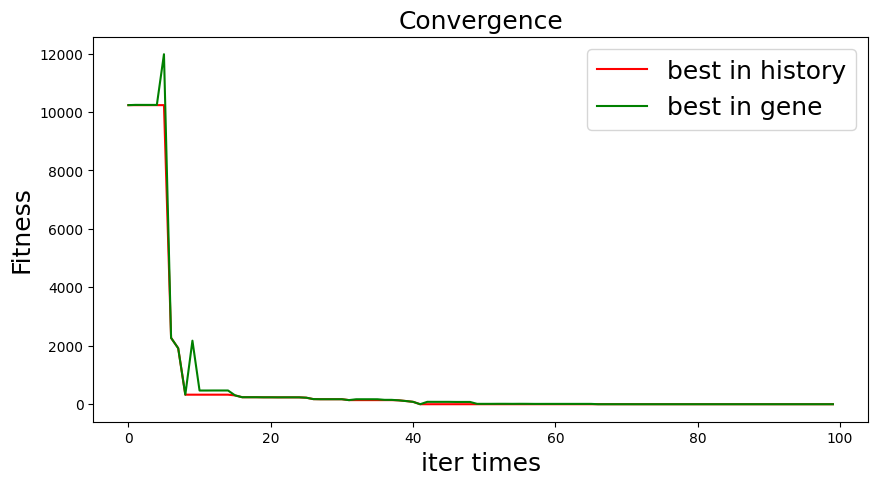

In [66]:
#visulization
plt.figure(figsize= (10,5))
plt.plot(GA.index, GA[4], 'r', label = 'best in history')
plt.plot(GA.index, GA[1], 'g', label = 'best in gene')
plt.title('Convergence', fontsize = 18)
plt.ylabel('Fitness', fontsize = 18)
plt.xlabel('iter times', fontsize = 18)
plt.legend(fontsize= 18)
plt.show() 